In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,LogLocator)

In [2]:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Computer Modern"],
#    "lines.linewidth": 0.8,
#})

delta_cmap = colors.ListedColormap(['white','C3'])

In [3]:
h = 6.6260755e-27 # erg s
hbar = h/(2.*np.pi) # erg s
c = 2.99792458e10 # cm/s
MeV = 1.60218e-6 # erg
eV = MeV/1e6 # erg
GF_GeV2 = 1.1663787e-5 # GeV^-2
GF = GF_GeV2 / (1000*MeV)**2 * (hbar*c)**3 # erg cm^3
Mp = 1.6726219e-24 # g

### Simulation data

In [ ]:
#input_filename = "../../neutrino_linear_stability/model_rl0_orthonormal.h5"
input_filename = "/nucastro3/jfroust/model_rl1_orthonormal.h5"

file = h5py.File(input_filename,'r')

#print(file.keys())

# Eddington factors
chi_a = file["eddfac_a(1|ccm)"][()]
chi_e = file["eddfac_e(1|ccm)"][()]
chi_x = file["eddfac_x(1|ccm)"][()]

# Crossing or not?
Delta = file["crossing_discriminant"][()]
Delta_scaled = np.heaviside(Delta, 0.)

# Temperature
T_array = file["T(MeV)"][()]

# Number densities
nue = file["n_e(1|ccm)"][()]
nuebar = file["n_a(1|ccm)"][()]
nux = file["n_x(1|ccm)"][()]

# Energy densities
J_e = file["J_e(erg|ccm)"][()]
J_ebar = file["J_a(erg|ccm)"][()]
J_x = file["J_x(erg|ccm)"][()]

E_e = J_e/nue/MeV #MeV
E_ebar = J_ebar/nuebar/MeV #MeV
E_x = J_x/nux/MeV #MeV

# Matter density
rho = file["rho(g|ccm)"][()]
Ye = file['Ye'][()]

# Flux factors
fee = file["fluxfac_e(1|ccm)"][()]
feebar = file["fluxfac_a(1|ccm)"][()]
fxx = file["fluxfac_x(1|ccm)"][()]
# They are such that fee[i,j,k] = np.linalg.norm(fnee[:,i,j,k]/nue[i,j,k])

# Fluxes, shape (3,nx,ny,nz)
fnee = file["fn_e(1|ccm)"][()]
fneebar = file["fn_a(1|ccm)"][()]
fnxx = file["fn_x(1|ccm)"][()]

x = file["x(cm)"][()]*1e-5 #(km)
y = file["y(cm)"][()]*1e-5 #(km)
z = file["z(cm)"][()]*1e-5 #(km)

#Collision rates
Coll_nue = file["nue_absrate(1|s)"][()]
Coll_nua = file["anue_absrate(1|s)"][()]

file.close()

In [ ]:
input_filename = "/nucastro3/jfroust/model_rl2_orthonormal.h5"

file = h5py.File(input_filename,'r')

# Number densities, shape (256,256,256)
nue_rl2 = file["n_e(1|ccm)"][()]
nuebar_rl2 = file["n_a(1|ccm)"][()]
nux_rl2 = file["n_x(1|ccm)"][()]

nutot_rl2 = nue_rl2 + nuebar_rl2 + nux_rl2

# Flux factors
fee_rl2 = file["fluxfac_e(1|ccm)"][()]
feebar_rl2 = file["fluxfac_a(1|ccm)"][()]
fxx_rl2 = file["fluxfac_x(1|ccm)"][()]
# They are such that fee[i,j,k] = np.linalg.norm(fnee[:,i,j,k]/nue[i,j,k])

# Fluxes, shape (3,nx,ny,nz)
fnee_rl2 = file["fn_e(1|ccm)"][()]
fneebar_rl2 = file["fn_a(1|ccm)"][()]
fnxx_rl2 = file["fn_x(1|ccm)"][()]

x_rl2 = file["x(cm)"][()]*1e-5 #(km)
y_rl2 = file["y(cm)"][()]*1e-5 #(km)
z_rl2 = file["z(cm)"][()]*1e-5 #(km)

# Crossing
Delta_rl2 = file["crossing_discriminant"][()]
Delta_scaled_rl2 = np.heaviside(Delta_rl2, 0.)

file.close()

### 1st level of refinement

input_filename = "/nucastro3/jfroust/M1-NuLib/model_rl1_orthonormal.h5"

file = h5py.File(input_filename,'r')

nue_rl1 = file["n_e(1|ccm)"][()]
nuebar_rl1 = file["n_a(1|ccm)"][()]
nux_rl1 = file["n_x(1|ccm)"][()]

nutot_rl1 = nue_rl1 + nuebar_rl1 + nux_rl1

# Flux factors
fee_rl1 = file["fluxfac_e(1|ccm)"][()]
feebar_rl1 = file["fluxfac_a(1|ccm)"][()]
fxx_rl1 = file["fluxfac_x(1|ccm)"][()]
# They are such that fee[i,j,k] = np.linalg.norm(fnee[:,i,j,k]/nue[i,j,k])

# Fluxes, shape (3,nx,ny,nz)
fnee_rl1 = file["fn_e(1|ccm)"][()]
fneebar_rl1 = file["fn_a(1|ccm)"][()]
fnxx_rl1 = file["fn_x(1|ccm)"][()]

x_rl1 = file["x(cm)"][()]*1e-5 #(km)
y_rl1 = file["y(cm)"][()]*1e-5 #(km)
z_rl1 = file["z(cm)"][()]*1e-5 #(km)

# Crossing
Delta_rl1 = file["crossing_discriminant"][()]
Delta_scaled_rl1 = np.heaviside(Delta_rl1, 0.)

file.close()

In [8]:
TrN_rl1 = nue_rl1+nux_rl1/2
TrN_rl2 = nue_rl2+nux_rl2/2

# Analysis - z slice

### Results of ML model

In [13]:
ml_filename = "result_rl1_z129.h5"

mlfile = h5py.File(ml_filename,'r')

#print(mlfile.keys())

F4_out = mlfile["F4_out"][()]
#Shape: (nx,ny,nz,mu=0..4,nu/nubar/flavor)
#CAREFUL THE TIME COMPONENT IS 3: 0-1-2:space, 3:time!!!!!

nue_out = F4_out[:,:,0,3,0,0]
nuebar_out = F4_out[:,:,0,3,1,0]
numu_out = F4_out[:,:,0,3,0,1]
numubar_out = F4_out[:,:,0,3,1,1]
nutau_out = F4_out[:,:,0,3,0,2]
nutaubar_out = F4_out[:,:,0,3,1,2]

nux_out = (numu_out+nutau_out)/2

mlfile.close()

F4_in = np.zeros_like(F4_out)
(nx,ny,nz,nmu,anti,flav) = np.shape(F4_out)

nue, nuebar, nux = nue_rl1, nuebar_rl1, nux_rl1
fnee, fneebar, fnxx = fnee_rl1, fneebar_rl1, fnxx_rl1

for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            F4_in[i,j,k,3] = np.array([[nue[i,j,129],nux[i,j,129]/4,nux[i,j,129]/4],
                                       [nuebar[i,j,129],nux[i,j,129]/4,nux[i,j,129]/4]])
            for r in range(3):
                F4_in[i,j,k,r] = np.array([[fnee[r,i,j,129],fnxx[r,i,j,129]/4,fnxx[r,i,j,129]/4],
                                               [fneebar[r,i,j,129],fnxx[r,i,j,129]/4,fnxx[r,i,j,129]/4]])
TrN_out_rl1 = nue_out + numu_out + nutau_out
Delta_F4_rl1 = (F4_out-F4_in)/F4_in
delta_Nee_rl1 = (nue_out - nue_rl1[:,:,129])/TrN_rl1[:,:,129]
delta_DN_rl1 = (nue_out - nux_out - nue_rl1[:,:,129] + nux_rl1[:,:,129]/4)/TrN_rl1[:,:,129]

In [14]:
ml_filename = "result_rl2_z130.h5"

mlfile = h5py.File(ml_filename,'r')

#print(mlfile.keys())

F4_out = mlfile["F4_out"][()]
#Shape: (nx,ny,mu=0..4,nu/nubar/flavor)
#CAREFUL THE TIME COMPONENT IS 3: 0-1-2:space, 3:time!!!!!

nue_out = F4_out[:,:,3,0,0]
nuebar_out = F4_out[:,:,3,1,0]
numu_out = F4_out[:,:,3,0,1]
numubar_out = F4_out[:,:,3,1,1]
nutau_out = F4_out[:,:,3,0,2]
nutaubar_out = F4_out[:,:,3,1,2]

nux_out = (numu_out+nutau_out)/2

mlfile.close()

F4_in = np.zeros_like(F4_out)
(nx,ny,nmu,anti,flav) = np.shape(F4_out)

nue, nuebar, nux = nue_rl2, nuebar_rl2, nux_rl2
fnee, fneebar, fnxx = fnee_rl2, fneebar_rl2, fnxx_rl2

for i in range(nx):
    for j in range(ny):
        F4_in[i,j,3] = np.array([[nue[i,j,130],nux[i,j,130]/4,nux[i,j,130]/4],
                                       [nuebar[i,j,130],nux[i,j,130]/4,nux[i,j,130]/4]])
        for r in range(3):
            F4_in[i,j,r] = np.array([[fnee[r,i,j,130],fnxx[r,i,j,130]/4,fnxx[r,i,j,130]/4],
                                               [fneebar[r,i,j,130],fnxx[r,i,j,130]/4,fnxx[r,i,j,130]/4]])
            
TrN_out_rl2 = nue_out + numu_out + nutau_out
Delta_F4_rl2 = (F4_out-F4_in)/F4_in
delta_Nee_rl2 = (nue_out - nue_rl2[:,:,130])/TrN_rl2[:,:,130]
delta_DN_rl2 = (nue_out - nux_out - nue_rl2[:,:,130] + nux_rl2[:,:,130]/4)/TrN_rl2[:,:,130]

## Analysis of ML results -- z slice

/tmp/ipykernel_1119846/335347307.py:2: RuntimeWarning: All-NaN slice encountered
  plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4,5))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/335347307.py:2: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4,5))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/335347307.py:3: RuntimeWarning: All-NaN slice encountered
  plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/335347307.py:3: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)


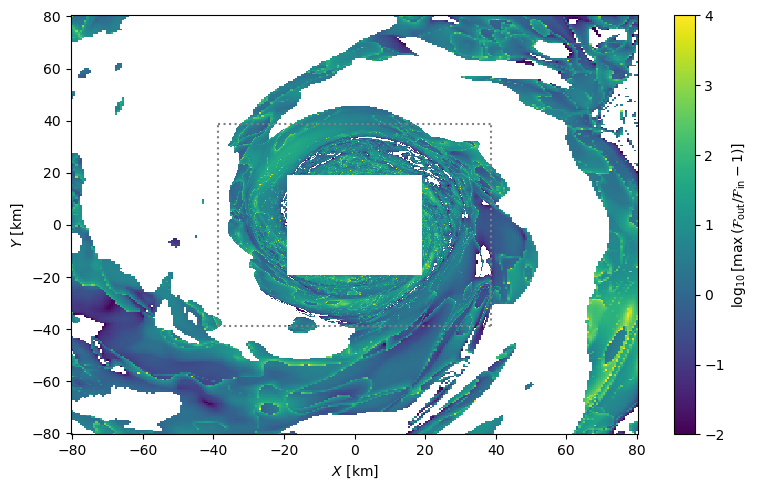

In [46]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4,5))),vmin=-2,vmax=4)
plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Y \ [\mathrm{km}]$')
plt.colorbar(label=r'$\mathrm{log}_{10} \, \left[ \mathrm{max} \, (\mathcal{F}_\mathrm{out}/\mathcal{F}_\mathrm{in}-1)\right]$')
plt.tight_layout()
plt.savefig("M1NuLib_z0_delta_F4.png",dpi=500)

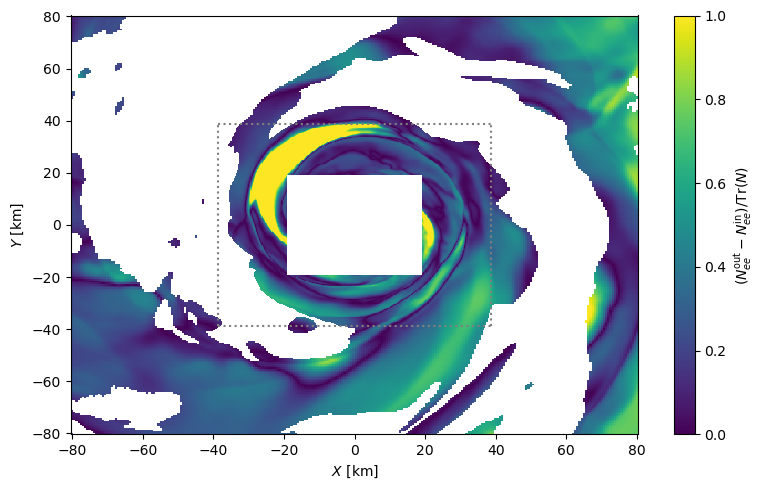

In [45]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],np.abs(delta_Nee_rl1),vmin=0, vmax=1.)
plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],np.abs(delta_Nee_rl2),vmin=0, vmax=1.)
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Y \ [\mathrm{km}]$')
plt.colorbar(label=r'$(N_{ee}^\mathrm{out}-N_{ee}^\mathrm{in})/\mathrm{Tr}(N)$')
plt.tight_layout()
plt.savefig("M1NuLib_z0_delta_Nee.png",dpi=500)

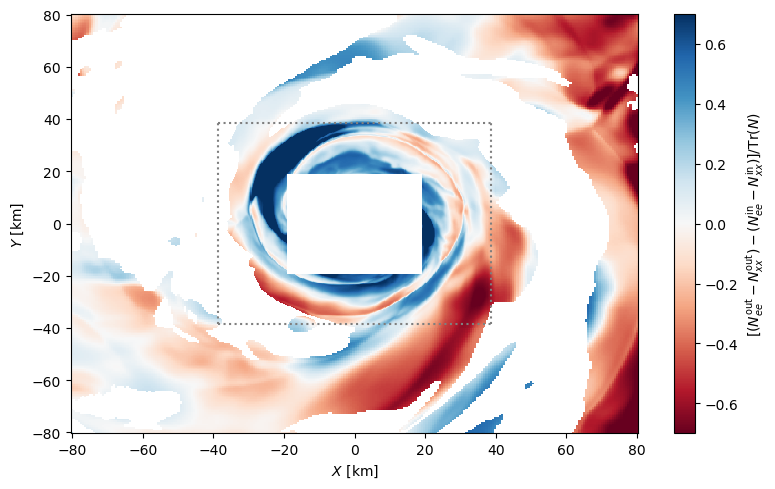

In [44]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],delta_DN_rl1,vmin=-0.7,vmax=0.7,cmap="RdBu")
plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],delta_DN_rl2,vmin=-0.7,vmax=0.7,cmap="RdBu")
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Y \ [\mathrm{km}]$')
plt.colorbar(label=r'$[(N_{ee}^\mathrm{out}-N_{xx}^\mathrm{out})-(N_{ee}^\mathrm{in}-N_{xx}^\mathrm{in})]/\mathrm{Tr}(N)$')
plt.tight_layout()
plt.savefig("M1NuLib_z0_delta_DN.png",dpi=500)

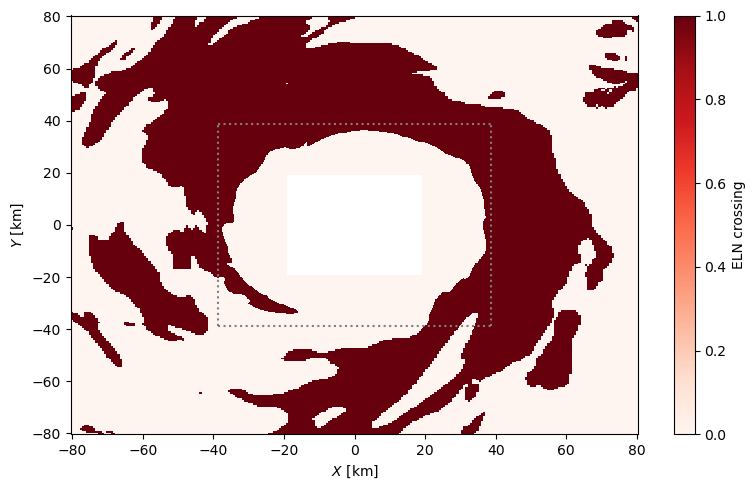

In [43]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,:,0],y_rl1[:,:,0],Delta_scaled_rl1[:,:,129],vmin=0,vmax=1,cmap="Reds")
plt.pcolormesh(x_rl2[:,:,0],y_rl2[:,:,0],Delta_scaled_rl2[:,:,130],vmin=0,vmax=1,cmap="Reds")
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Y \ [\mathrm{km}]$')
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.colorbar(label='ELN crossing')
plt.tight_layout()
plt.savefig("M1NuLib_z0_ELN.png",dpi=500)

# Analysis -- y slice

In [49]:
ml_filename = "result_rl1_y129.h5"

mlfile = h5py.File(ml_filename,'r')

#print(mlfile.keys())

F4_out = mlfile["F4_out"][()]
#Shape: (nx,nz,mu=0..4,nu/nubar/flavor)
#CAREFUL THE TIME COMPONENT IS 3: 0-1-2:space, 3:time!!!!!

nue_out = F4_out[:,:,3,0,0]
nuebar_out = F4_out[:,:,3,1,0]
numu_out = F4_out[:,:,3,0,1]
numubar_out = F4_out[:,:,3,1,1]
nutau_out = F4_out[:,:,3,0,2]
nutaubar_out = F4_out[:,:,3,1,2]

nux_out = (numu_out+nutau_out)/2

mlfile.close()

F4_in = np.zeros_like(F4_out)
(nx,nz,nmu,anti,flav) = np.shape(F4_out)

nue, nuebar, nux = nue_rl1, nuebar_rl1, nux_rl1
fnee, fneebar, fnxx = fnee_rl1, fneebar_rl1, fnxx_rl1

for i in range(nx):
    for k in range(nz):
        j=129
        F4_in[i,k,3] = np.array([[nue[i,j,k],nux[i,j,k]/4,nux[i,j,k]/4],
                                       [nuebar[i,j,k],nux[i,j,k]/4,nux[i,j,k]/4]])
        for r in range(3):
            F4_in[i,k,r] = np.array([[fnee[r,i,j,k],fnxx[r,i,j,k]/4,fnxx[r,i,j,k]/4],
                                               [fneebar[r,i,j,k],fnxx[r,i,j,k]/4,fnxx[r,i,j,k]/4]])
TrN_out_rl1 = nue_out + numu_out + nutau_out
Delta_F4_rl1 = (F4_out-F4_in)/F4_in
delta_Nee_rl1 = (nue_out - nue_rl1[:,129,:])/TrN_rl1[:,129,:]
delta_DN_rl1 = (nue_out - nux_out - nue_rl1[:,129,:] + nux_rl1[:,129,:]/4)/TrN_rl1[:,129,:]

In [50]:
ml_filename = "result_rl2_y130.h5"

mlfile = h5py.File(ml_filename,'r')

#print(mlfile.keys())

F4_out = mlfile["F4_out"][()]
#Shape: (nx,nz,mu=0..4,nu/nubar/flavor)
#CAREFUL THE TIME COMPONENT IS 3: 0-1-2:space, 3:time!!!!!

nue_out = F4_out[:,:,3,0,0]
nuebar_out = F4_out[:,:,3,1,0]
numu_out = F4_out[:,:,3,0,1]
numubar_out = F4_out[:,:,3,1,1]
nutau_out = F4_out[:,:,3,0,2]
nutaubar_out = F4_out[:,:,3,1,2]

nux_out = (numu_out+nutau_out)/2

mlfile.close()

F4_in = np.zeros_like(F4_out)
(nx,nz,nmu,anti,flav) = np.shape(F4_out)

nue, nuebar, nux = nue_rl2, nuebar_rl2, nux_rl2
fnee, fneebar, fnxx = fnee_rl2, fneebar_rl2, fnxx_rl2

for i in range(nx):
    for k in range(nz):
        j=130
        F4_in[i,k,3] = np.array([[nue[i,j,k],nux[i,j,k]/4,nux[i,j,k]/4],
                                       [nuebar[i,j,k],nux[i,j,k]/4,nux[i,j,k]/4]])
        for r in range(3):
            F4_in[i,k,r] = np.array([[fnee[r,i,j,k],fnxx[r,i,j,k]/4,fnxx[r,i,j,k]/4],
                                               [fneebar[r,i,j,k],fnxx[r,i,j,k]/4,fnxx[r,i,j,k]/4]])
TrN_out_rl2 = nue_out + numu_out + nutau_out
Delta_F4_rl2 = (F4_out-F4_in)/F4_in
delta_Nee_rl2 = (nue_out - nue_rl2[:,130,:])/TrN_rl2[:,130,:]
delta_DN_rl2 = (nue_out - nux_out - nue_rl2[:,130,:] + nux_rl2[:,130,:]/4)/TrN_rl2[:,130,:]

## Analysis of ML results -- y slice

/tmp/ipykernel_1119846/2303052508.py:2: RuntimeWarning: All-NaN slice encountered
  plt.pcolormesh(x_rl1[:,0,:],z_rl1[:,0,:],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/2303052508.py:2: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x_rl1[:,0,:],z_rl1[:,0,:],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/2303052508.py:3: RuntimeWarning: All-NaN slice encountered
  plt.pcolormesh(x_rl2[:,0,:],z_rl2[:,0,:],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)
/tmp/ipykernel_1119846/2303052508.py:3: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x_rl2[:,0,:],z_rl2[:,0,:],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)


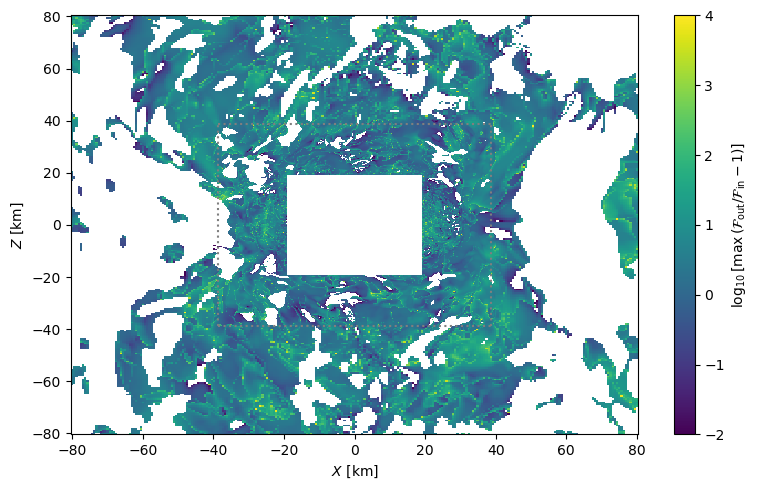

In [51]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,0,:],z_rl1[:,0,:],np.log10(np.nanmax(Delta_F4_rl1,axis=(2,3,4))),vmin=-2,vmax=4)
plt.pcolormesh(x_rl2[:,0,:],z_rl2[:,0,:],np.log10(np.nanmax(Delta_F4_rl2,axis=(2,3,4))),vmin=-2,vmax=4)
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Z \ [\mathrm{km}]$')
plt.colorbar(label=r'$\mathrm{log}_{10} \, \left[ \mathrm{max} \, (\mathcal{F}_\mathrm{out}/\mathcal{F}_\mathrm{in}-1)\right]$')
plt.tight_layout()
plt.savefig("M1NuLib_y0_delta_F4.png",dpi=500)

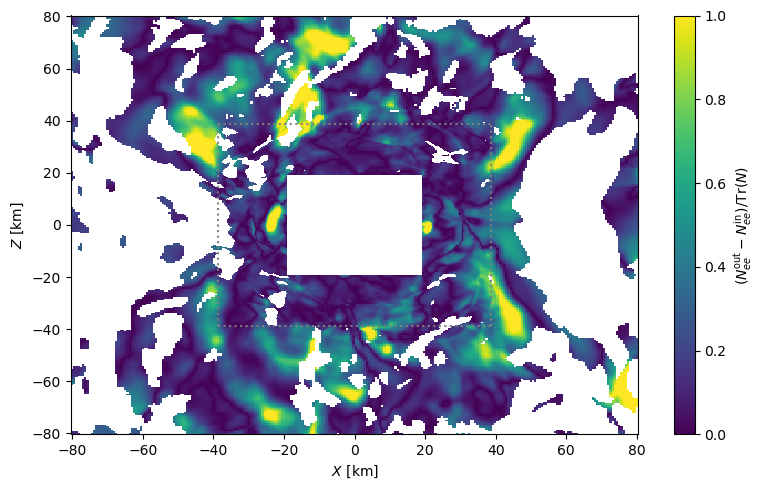

In [53]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,0,:],z_rl1[:,0,:],np.abs(delta_Nee_rl1),vmin=0, vmax=1.)
plt.pcolormesh(x_rl2[:,0,:],z_rl2[:,0,:],np.abs(delta_Nee_rl2),vmin=0, vmax=1.)
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Z \ [\mathrm{km}]$')
plt.colorbar(label=r'$(N_{ee}^\mathrm{out}-N_{ee}^\mathrm{in})/\mathrm{Tr}(N)$')
plt.tight_layout()
plt.savefig("M1NuLib_y0_delta_Nee.png",dpi=500)

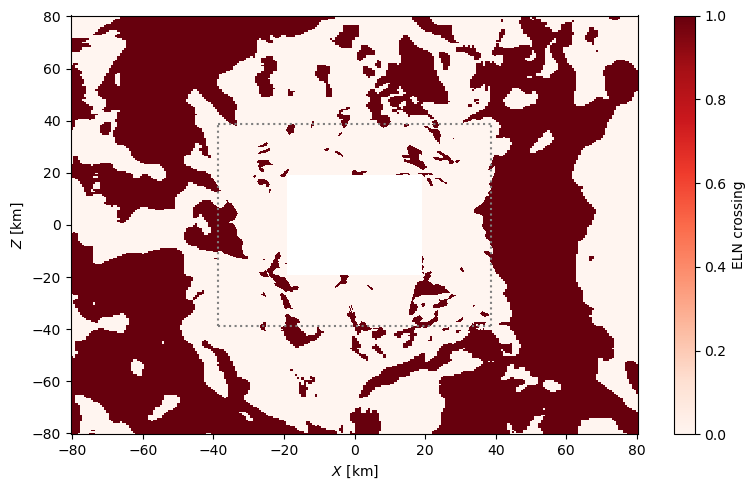

In [52]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x_rl1[:,0,:],z_rl1[:,0,:],Delta_scaled_rl1[:,129,:],vmin=0,vmax=1,cmap="Reds")
plt.pcolormesh(x_rl2[:,0,:],z_rl2[:,0,:],Delta_scaled_rl2[:,130,:],vmin=0,vmax=1,cmap="Reds")
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Z \ [\mathrm{km}]$')
plt.plot([-38.61625527,-38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([38.61625527,38.61625527],[-38.61625527,38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[-38.61625527,-38.61625527],color='C7',ls=':')
plt.plot([-38.61625527,38.61625527],[38.61625527,38.61625527],color='C7',ls=':')
plt.colorbar(label='ELN crossing')
plt.tight_layout()
plt.savefig("M1NuLib_y0_ELN.png",dpi=500)

### Flux factors

In [20]:
#Shape of F4: (nx,ny,nz,mu=0..4,nu/nubar/flavor)
fluxfac_in = np.sqrt(np.sum(F4_in[:,:,:,0:3,:,:]**2,axis=3)/F4_in[:,:,:,3,:,:]**2)
fluxfac_out = np.sqrt(np.sum(F4_out[:,:,:,0:3,:,:]**2,axis=3)/F4_out[:,:,:,3,:,:]**2)

/tmp/ipykernel_868226/2987068856.py:3: RuntimeWarning: invalid value encountered in divide
  fluxfac_out = np.sqrt(np.sum(F4_out[:,:,:,0:3,:,:]**2,axis=3)/F4_out[:,:,:,3,:,:]**2)


In [25]:
np.nanmax(fluxfac_out)

0.9916452554007025

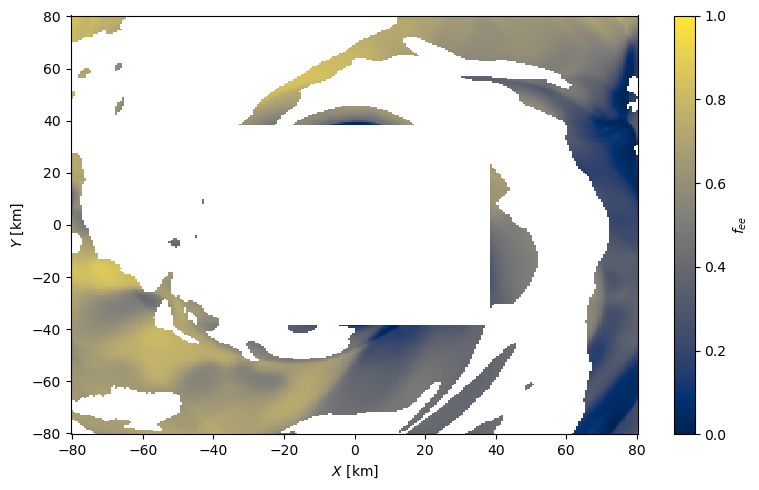

In [24]:
plt.figure(figsize=(8.,5.))
plt.pcolormesh(x[:,:,0],y[:,:,0],fluxfac_out[:,:,0,0,0],vmin=0,vmax=1,cmap='cividis')
plt.xlabel(r'$X \ [\mathrm{km}]$')
plt.ylabel(r'$Y \ [\mathrm{km}]$')
plt.colorbar(label=r'$f_{ee}$')
plt.tight_layout()